In [1]:
# import lime
import sklearn
import numpy as np
import sklearn
import sklearn.ensemble
import sklearn.metrics
from __future__ import print_function

# Loading required packages
import spacy
import pandas as pd
import re
# import gensim
# import gensim.downloader
# from gensim.models import Word2Vec
# from gensim.test.utils import common_texts
# from gensim.models import Word2Vec
# from gensim.models.phrases import Phrases, Phraser
import nltk
from numpy import mean
from numpy import std
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from statistics import mean
import json
import csv
import ast
import numpy as np

# from flair.embeddings import WordEmbeddings
# from flair.data import Sentence
# from flair.embeddings import TransformerWordEmbeddings

from tqdm import tqdm
import pickle 
# Set seed
seed = np.random.seed(1)


# Select Spacy model
# Efficiency
nlp = spacy.load("en_core_web_sm")

# Accuracy
# nlp = spacy.load("en_core_web_trf")

# Change working directory
# %cd '/Users/richardfrissen/Documents/Maastricht University/Thesis/Development/Datasets'

2021-07-27 07:59:16.664756: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-07-27 07:59:16.664823: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
class_names=['Demographic and Racial language', 'Exclusive language', 'Feminine-coded words', 'LGBTQ-coloured language', 'Masculine-coded words', 'O']

In [4]:
%%time

# Optionally the data can be saved to create a checkpoint

# data.to_csv('data_features_full_wordembedding_glove.csv', index = False)

data = pd.read_csv('data_features_full_wordembedding_fasttext.csv', nrows = 100000, na_values=['nan'])

data.head(10)

CPU times: user 6.01 s, sys: 452 ms, total: 6.47 s
Wall time: 7.32 s


,Token,Label,pos,ent_type,is_alpha,is_ascii,is_digit,is_lower,is_upper,is_title,...,290,291,292,293,294,295,296,297,298,299
0,food,O,92,0,True,True,False,True,False,False,...,-0.039578,0.047575,-0.058627,0.046259,0.023654,0.051156,-0.025376,0.194072,0.064826,-0.043009
1,a,O,90,0,True,True,False,True,False,False,...,0.428693,0.140281,-0.160824,0.140865,0.010901,-0.006161,-0.024191,0.534851,-0.055810,-0.016598
2,fast,O,86,0,True,True,False,True,False,False,...,0.088452,0.049980,-0.188911,0.008010,0.005692,0.030967,0.088043,0.132366,-0.068855,-0.109943
3,grow,O,100,0,True,True,False,True,False,False,...,0.079889,-0.001241,-0.078710,0.056499,-0.040299,0.026815,0.016724,0.003833,0.141033,0.139362
4,-winne,O,97,0,False,True,False,True,False,False,...,0.026260,-0.142785,-0.139935,0.030903,0.135329,-0.037944,-0.159724,0.062729,-0.032213,-0.062005
5,online,O,86,0,True,True,False,True,False,False,...,-0.011911,0.032228,-0.046799,-0.049946,-0.098857,0.027563,0.032633,0.078089,-0.021893,0.010680
6,food,O,92,0,True,True,False,True,False,False,...,-0.039578,0.047575,-0.058627,0.046259,0.023654,0.051156,-0.025376,0.194072,0.064826,-0.043009
7,community,O,92,0,True,True,False,True,False,False,...,0.001633,0.012280,-0.018961,0.068939,-0.038316,0.001767,0.018424,0.039195,0.033368,0.054643
8,and,O,89,0,True,True,False,True,False,False,...,0.060722,-0.035507,-0.023820,-0.027755,-0.026023,-0.038051,-0.021103,-0.011591,-0.041129,0.036252
9,crowd,O,92,0,True,True,False,True,False,False,...,0.037642,-0.092540,-0.013170,0.092988,0.080099,-0.030800,0.069824,0.092307,-0.001399,-0.007892


In [5]:
data["Label"] = data["Label"].astype('category').cat.codes

In [6]:
%%time

# Replace NaN values with a "0"

data = data.replace(np.nan, '0', regex=True)

# We drop the token, as it is no longer needed for prediction
data.drop('Token', axis=1, inplace=True)
data.head(10)

# data = data.stack().str.decode('utf-8').unstack()

CPU times: user 83.9 ms, sys: 68 ms, total: 152 ms
Wall time: 149 ms


,Label,pos,ent_type,is_alpha,is_ascii,is_digit,is_lower,is_upper,is_title,is_punct,...,290,291,292,293,294,295,296,297,298,299
0,5,92,0,True,True,False,True,False,False,False,...,-0.039578,0.047575,-0.058627,0.046259,0.023654,0.051156,-0.025376,0.194072,0.064826,-0.043009
1,5,90,0,True,True,False,True,False,False,False,...,0.428693,0.140281,-0.160824,0.140865,0.010901,-0.006161,-0.024191,0.534851,-0.055810,-0.016598
2,5,86,0,True,True,False,True,False,False,False,...,0.088452,0.049980,-0.188911,0.008010,0.005692,0.030967,0.088043,0.132366,-0.068855,-0.109943
3,5,100,0,True,True,False,True,False,False,False,...,0.079889,-0.001241,-0.078710,0.056499,-0.040299,0.026815,0.016724,0.003833,0.141033,0.139362
4,5,97,0,False,True,False,True,False,False,False,...,0.026260,-0.142785,-0.139935,0.030903,0.135329,-0.037944,-0.159724,0.062729,-0.032213,-0.062005
5,5,86,0,True,True,False,True,False,False,False,...,-0.011911,0.032228,-0.046799,-0.049946,-0.098857,0.027563,0.032633,0.078089,-0.021893,0.010680
6,5,92,0,True,True,False,True,False,False,False,...,-0.039578,0.047575,-0.058627,0.046259,0.023654,0.051156,-0.025376,0.194072,0.064826,-0.043009
7,5,92,0,True,True,False,True,False,False,False,...,0.001633,0.012280,-0.018961,0.068939,-0.038316,0.001767,0.018424,0.039195,0.033368,0.054643
8,5,89,0,True,True,False,True,False,False,False,...,0.060722,-0.035507,-0.023820,-0.027755,-0.026023,-0.038051,-0.021103,-0.011591,-0.041129,0.036252
9,5,92,0,True,True,False,True,False,False,False,...,0.037642,-0.092540,-0.013170,0.092988,0.080099,-0.030800,0.069824,0.092307,-0.001399,-0.007892


In [7]:
%%time

# 80% / 20% split
# Train, Test = train_test_split(data1, test_size=0.2, shuffle=False)

X = data.drop(['Label'],axis=1).values # independant features
y = data['Label'].values # dependant variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

CPU times: user 969 ms, sys: 690 ms, total: 1.66 s
Wall time: 1.67 s


In [8]:
max_iterations = 1000000000

In [9]:
# Optionally the data can be saved to create a checkpoint - RF

import pickle

# f = open('fasttext_rf.pckl', 'wb')
# pickle.dump(clf, f)
# f.close()

f = open('fasttext_rf.pckl', 'rb')
clf = pickle.load(f)
f.close()

In [10]:
type(X)

numpy.ndarray

In [11]:
X_featurenames = (pd.DataFrame(X_train)).columns

In [12]:
len(X_featurenames)

316

In [13]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)

In [14]:
# %time
# explainer = shap.TreeExplainer(clf)
# shap_values = explainer.shap_values(X_train, check_additivity=False)

In [15]:
import shap

In [15]:
%time
shap_values = shap.TreeExplainer(clf).shap_values(X_train, check_additivity=False)

CPU times: user 6 µs, sys: 4 µs, total: 10 µs
Wall time: 22.4 µs


CPU times: user 7 µs, sys: 4 µs, total: 11 µs
Wall time: 16.7 µs


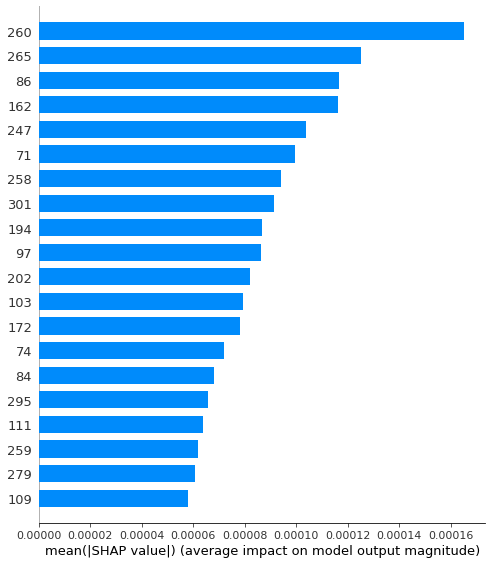

In [20]:
%time
shap.summary_plot(shap_values[0], X_train, plot_type="bar")

CPU times: user 5 µs, sys: 4 µs, total: 9 µs
Wall time: 16.5 µs


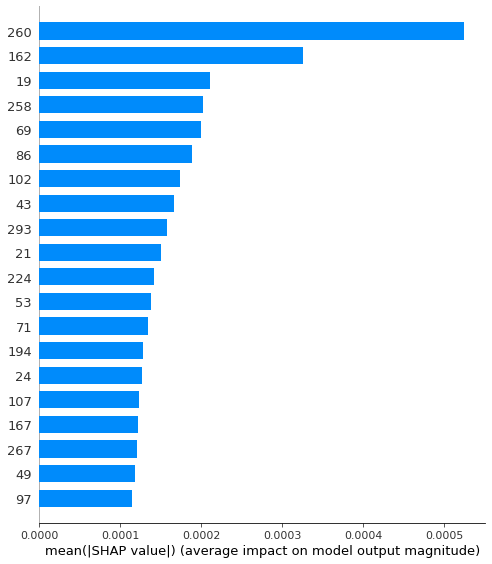

In [21]:
%time
shap.summary_plot(shap_values[1], X_train, plot_type="bar")

CPU times: user 4 µs, sys: 3 µs, total: 7 µs
Wall time: 15.7 µs


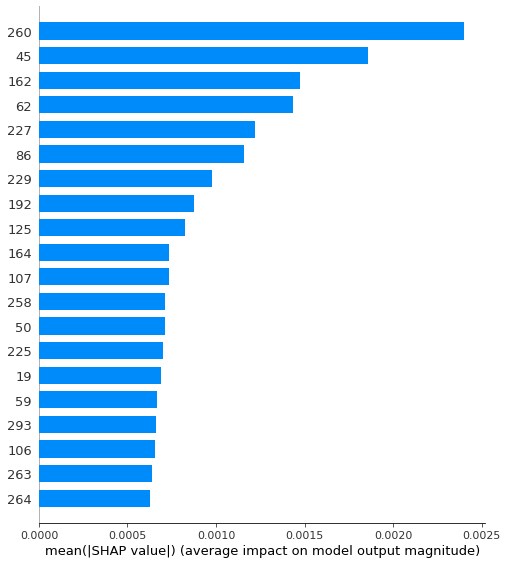

In [22]:
%time
shap.summary_plot(shap_values[2], X_train, plot_type="bar")

CPU times: user 4 µs, sys: 4 µs, total: 8 µs
Wall time: 15.7 µs


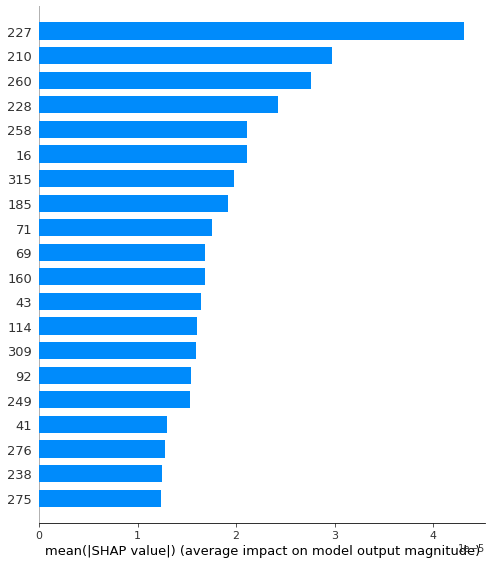

In [23]:
%time
shap.summary_plot(shap_values[3], X_train, plot_type="bar")

CPU times: user 0 ns, sys: 11 µs, total: 11 µs
Wall time: 22.4 µs


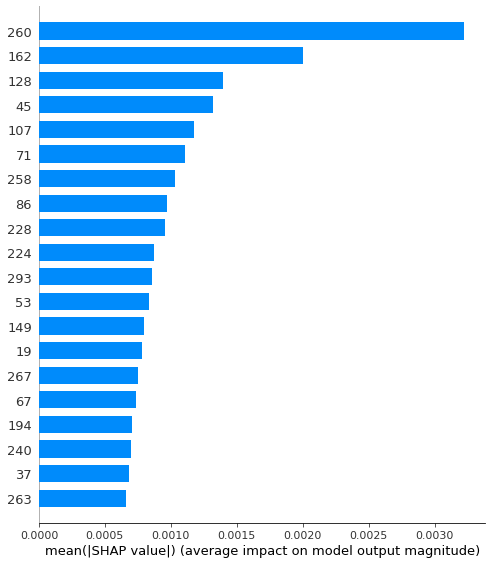

In [24]:
%time
shap.summary_plot(shap_values[4], X_train, plot_type="bar")

CPU times: user 4 µs, sys: 3 µs, total: 7 µs
Wall time: 15.5 µs


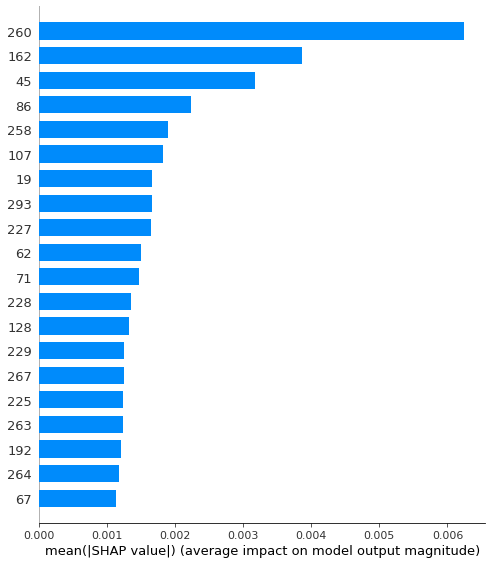

In [25]:
%time
shap.summary_plot(shap_values[5], X_train, plot_type="bar")

CPU times: user 4 µs, sys: 4 µs, total: 8 µs
Wall time: 16 µs


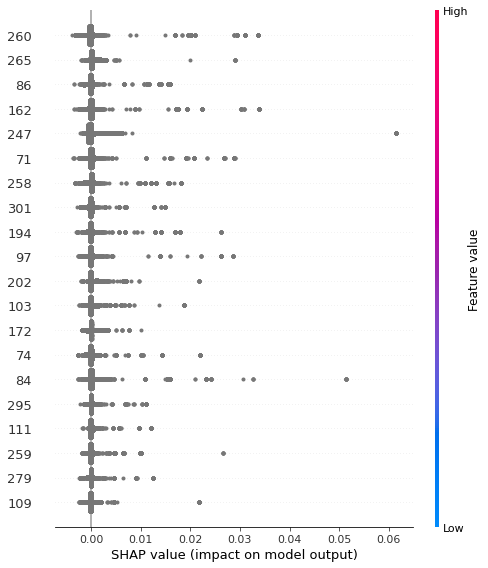

In [26]:
%time
shap.summary_plot(shap_values[0], X_train, feature_names = X_train.columns)

CPU times: user 5 µs, sys: 3 µs, total: 8 µs
Wall time: 18.6 µs


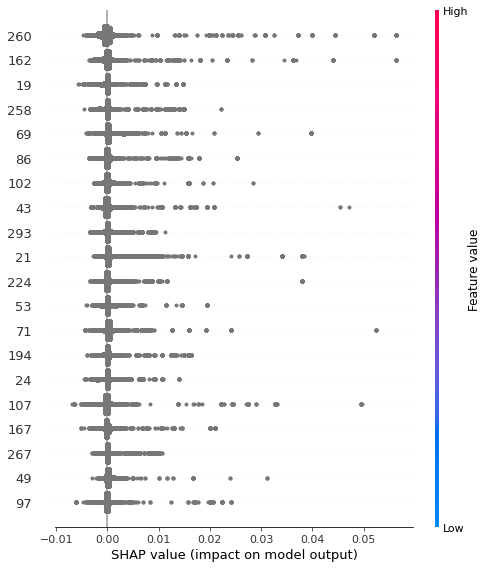

In [27]:
%time
shap.summary_plot(shap_values[1], X_train, feature_names = X_train.columns)

CPU times: user 5 µs, sys: 2 µs, total: 7 µs
Wall time: 18.6 µs


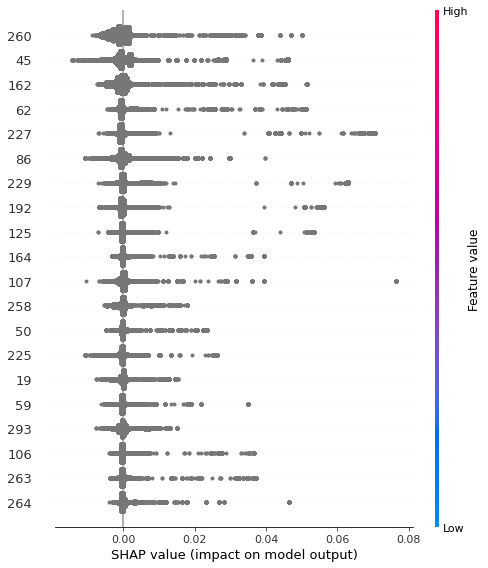

In [28]:
%time
shap.summary_plot(shap_values[2], X_train, feature_names = X_train.columns)

CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 18.6 µs


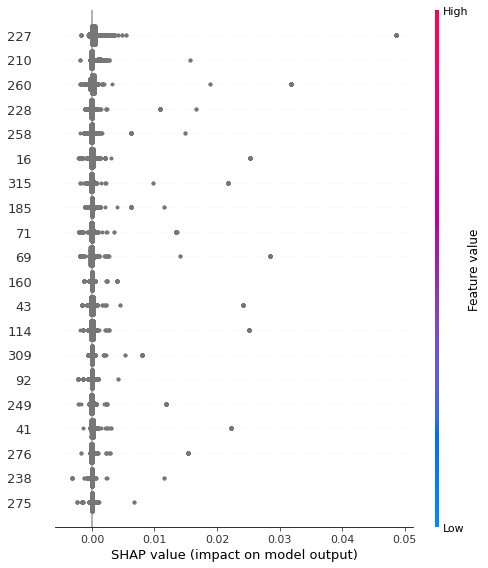

In [29]:
%time
shap.summary_plot(shap_values[3], X_train, feature_names = X_train.columns)

CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 15.5 µs


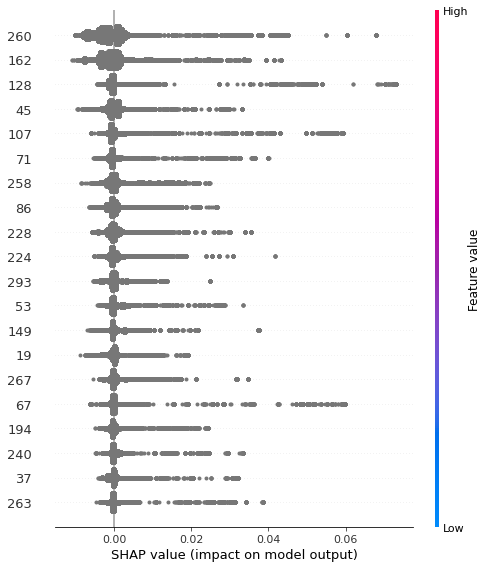

In [30]:
%time
shap.summary_plot(shap_values[4], X_train, feature_names = X_train.columns)

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 18.8 µs


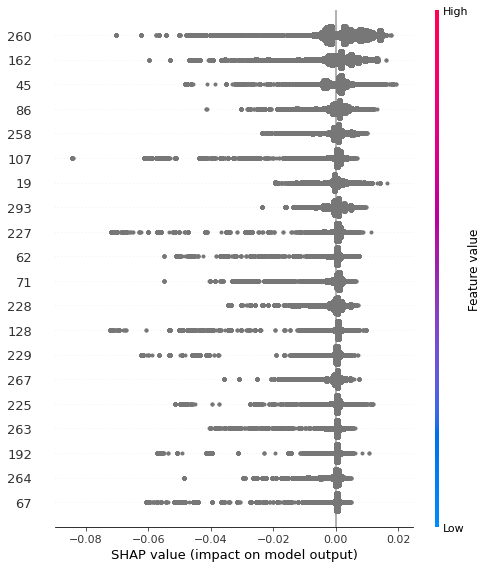

In [33]:
%time
shap.summary_plot(shap_values[5], X_train, feature_names = X_train.columns)

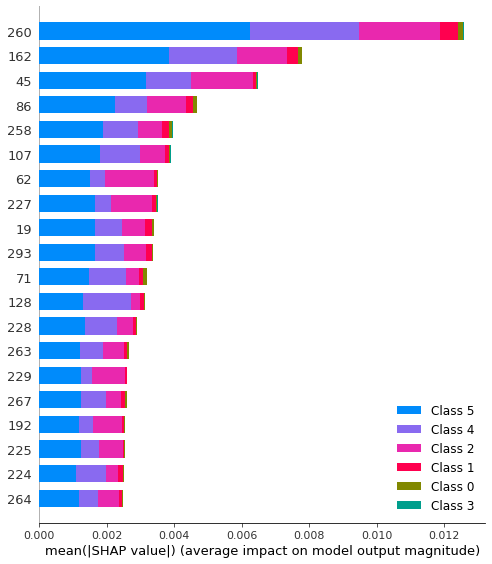

In [34]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [15]:
# Optionally the data can be saved to create a checkpoint - Shap RF

import pickle

# f = open('shap_values_fasttext_rf.pckl', 'wb')
# pickle.dump(shap_values, f)
# f.close()

f = open('shap_values_fasttext_rf.pckl', 'rb')
shap_values = pickle.load(f)
f.close()